In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
# warnings.filterwarnings("ignore", caterogy=DeprecationWarning)

C:\Users\91812\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
load_dotenv()  # Load from .env

db_config = {
    'host': os.getenv("DB_HOST"),
    'user': os.getenv("DB_USER"),
    'password': os.getenv("DB_PASSWORD"),
    'database': os.getenv("DB_NAME")
}

FUNCTION THAT TAKES QUERY, RUNS IT AND RETURNS OUTPUT

In [3]:
def run_query(query):
    # Establish connection
    conn = mysql.connector.connect(**db_config)
    
    try:
        # Run the query and load into DataFrame
        df = pd.read_sql(query, conn)
        return df
    except Exception as e:
        print("Error:", e)
        return None
    finally:
        conn.close()


# Total spending per customer

In [5]:
query1 = """
SELECT
	customer_name,
    SUM(amount) total_amount
FROM customer_transactions
WHERE status='success'
GROUP BY customer_name;
"""

query1_output = run_query(query1)

query1_output

C:\Users\91812\AppData\Local\Temp\ipykernel_19696\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,customer_name,total_amount
0,Rahul Sen,182500.0
1,Ananya Roy,1998.0
2,Sourav Das,177300.0
3,Vikram Joshi,31900.0
4,Meera Iyer,1200.0
5,Karan Kapoor,49399.0
6,Sneha Patil,6999.0
7,Ravi Shankar,106400.0
8,Alok Reddy,16500.0
9,Isha Jain,25149.0


C:\Users\91812\AppData\Local\Temp\ipykernel_19696\2387404484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query1_output, x='customer_name', y='total_amount', palette='Blues_d')


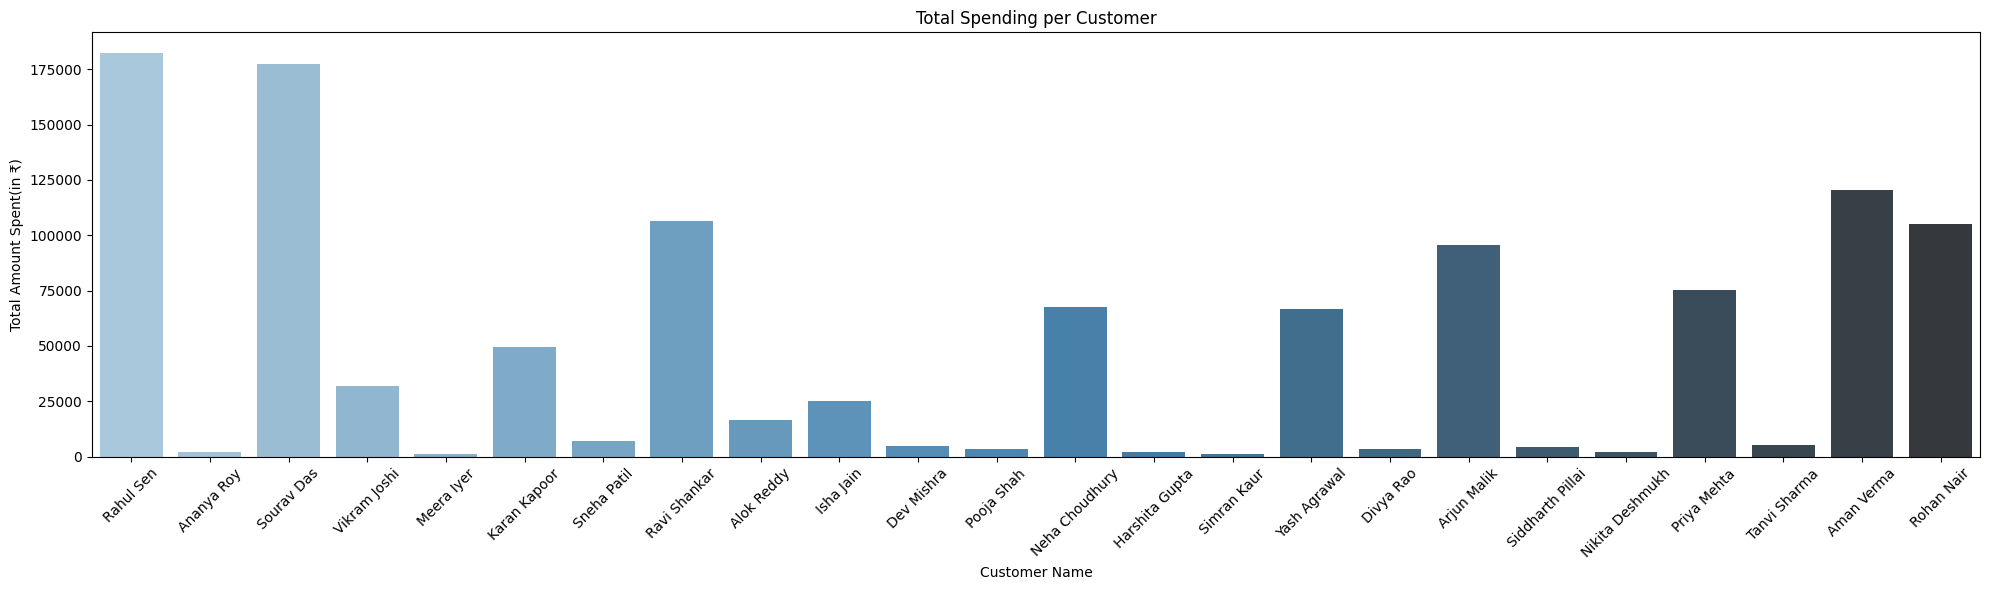

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=query1_output, x='customer_name', y='total_amount', palette='Blues_d')
plt.title("Total Spending per Customer")
plt.xlabel("Customer Name")
plt.ylabel("Total Amount Spent(in ₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 vendors by revenue

In [7]:
query2 = """
SELECT
	vendor_id,
    vendor_name,
    category,
    total_earned
FROM vendor_performance
ORDER BY total_earned DESC
LIMIT 5;
"""

query2_output = run_query(query2)

query2_output

C:\Users\91812\AppData\Local\Temp\ipykernel_19696\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,vendor_id,vendor_name,category,total_earned
0,1,Flipkart,Electronics,209700.0
1,3,Big Bazaar,Grocery,207300.0
2,4,Myntra,Fashion,201299.0
3,5,Spencer’s,Grocery,178350.0
4,2,Amazon,E-commerce,115100.0


C:\Users\91812\AppData\Local\Temp\ipykernel_19696\754916401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query2_output, y='vendor_name', x='total_earned', palette='Blues_d')


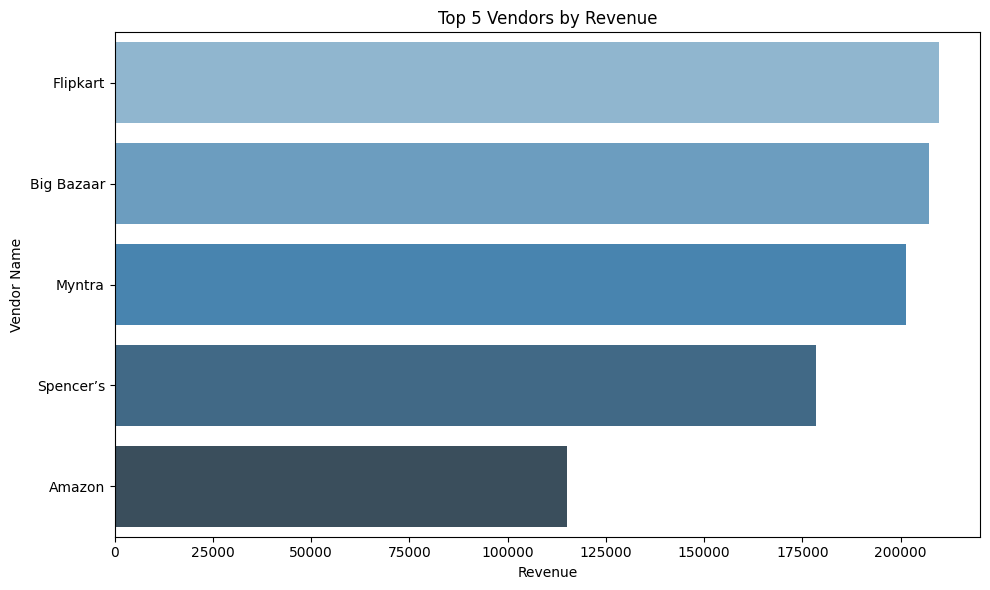

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=query2_output, y='vendor_name', x='total_earned', palette='Blues_d')
plt.title("Top 5 Vendors by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Vendor Name")
plt.tight_layout()
plt.show()

# Category-wise vendors earning

In [10]:
query3="""
SELECT * FROM category_wise_vendor_earning;
"""
query3_output = run_query(query3)

query3_output

C:\Users\91812\AppData\Local\Temp\ipykernel_19696\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,category,amount_earned
0,Grocery,392349.0
1,Travel,11698.0
2,Electronics,219750.0
3,Fashion,230921.0
4,Retail,3500.0
5,Food Delivery,18999.0
6,E-commerce,127600.0
7,Transport,28100.0
8,Furniture,5350.0
9,Apparel,5199.0


C:\Users\91812\AppData\Local\Temp\ipykernel_19696\3130091090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query3_output, x='category', y='amount_earned', palette='viridis')


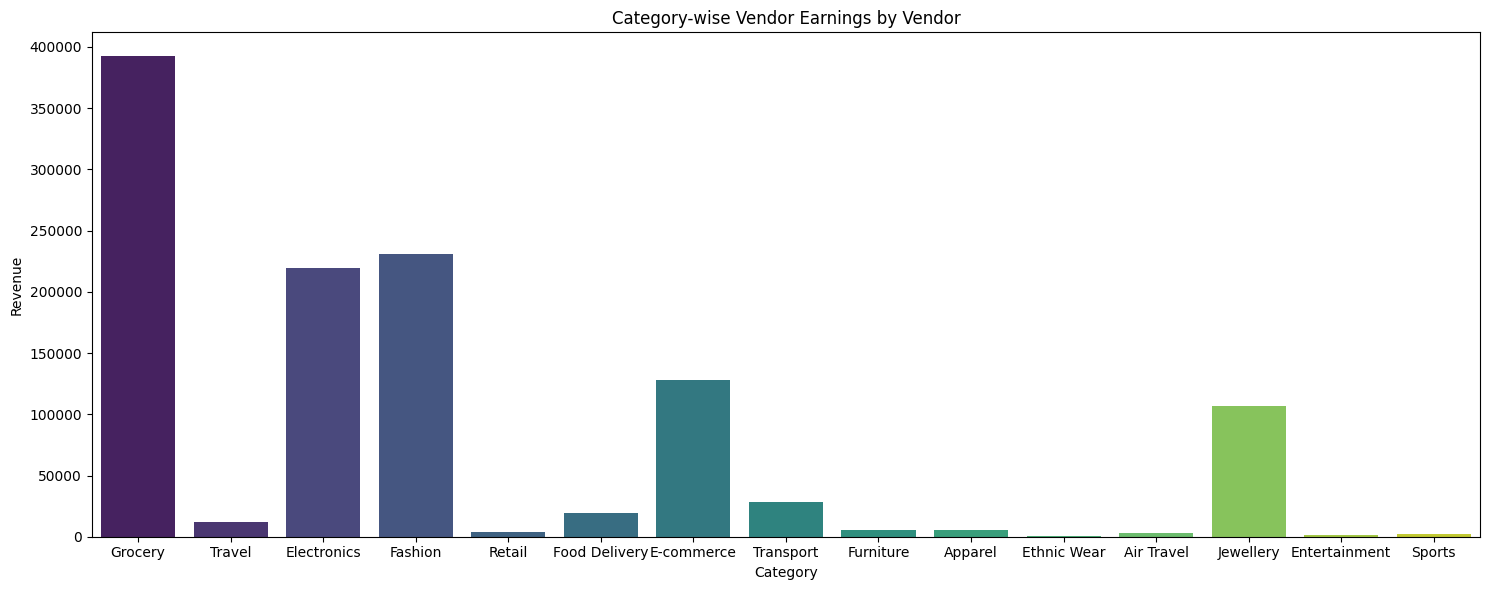

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=query3_output, x='category', y='amount_earned', palette='viridis')
plt.title("Category-wise Vendor Earnings by Vendor")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# No of failed/reversed transactions per customer

In [12]:
query4="""
SELECT
	cu.customer_id,
    cu.customer_name,
    SUM(
		CASE
			WHEN t.status='success' THEN 0
            ELSE 1
		END
	) failed_reversed_transactions
FROM customers cu
LEFT JOIN credit_cards cc ON cu.customer_id=cc.customer_id
LEFT JOIN transactions t ON t.card_id=cc.card_id
GROUP BY cu.customer_id;
"""

query4_output = run_query(query4)

query4_output

C:\Users\91812\AppData\Local\Temp\ipykernel_19696\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,customer_id,customer_name,failed_reversed_transactions
0,1,Rahul Sen,1.0
1,2,Ananya Roy,0.0
2,3,Sourav Das,0.0
3,4,Priya Mehta,1.0
4,5,Vikram Joshi,1.0
5,6,Meera Iyer,1.0
6,7,Karan Kapoor,0.0
7,8,Sneha Patil,0.0
8,9,Ravi Shankar,2.0
9,10,Tanvi Sharma,1.0


C:\Users\91812\AppData\Local\Temp\ipykernel_19696\3847235100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query4_output, x='customer_name', y='failed_reversed_transactions', palette='Reds_d')


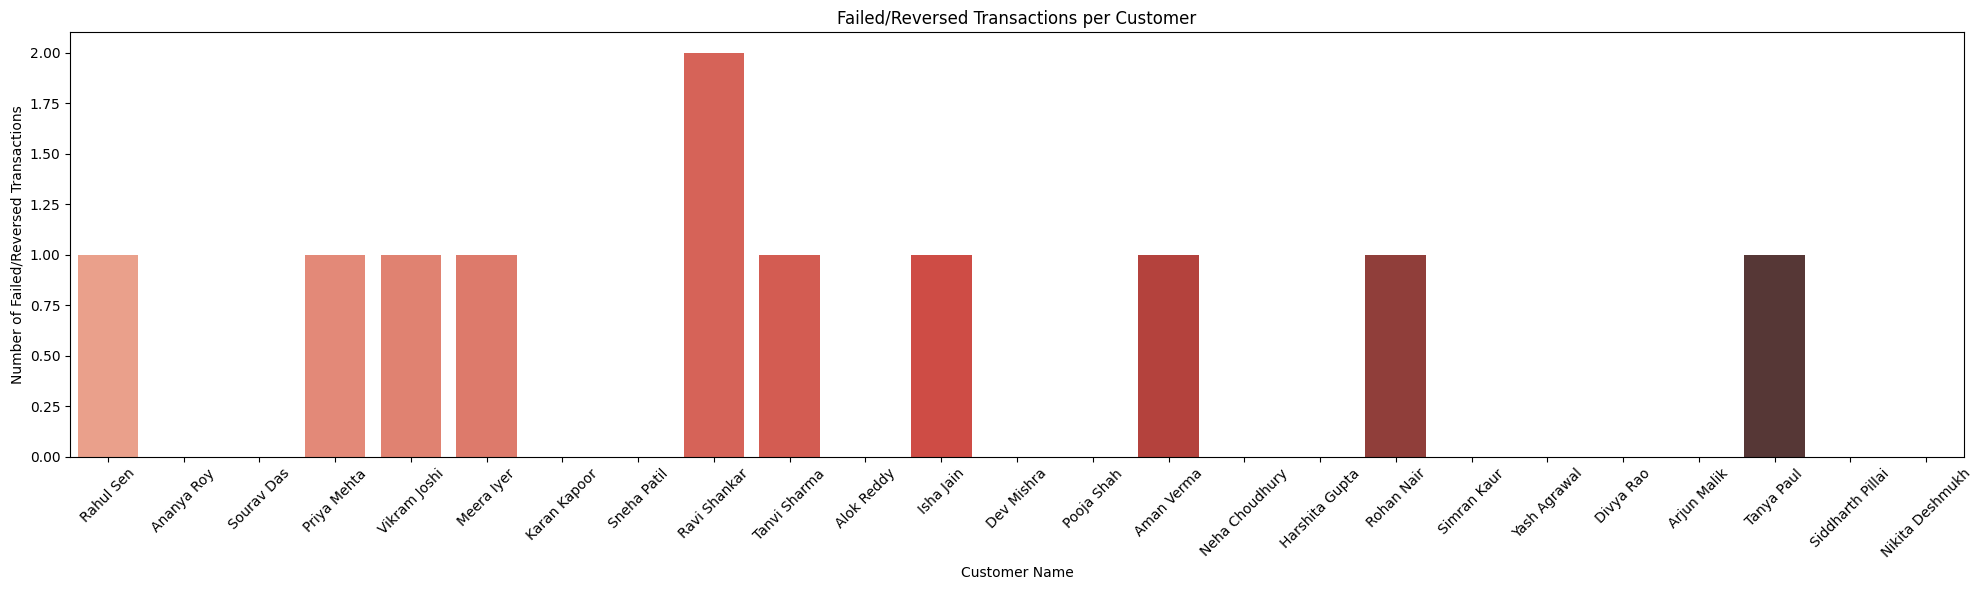

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=query4_output, x='customer_name', y='failed_reversed_transactions', palette='Reds_d')
plt.title("Failed/Reversed Transactions per Customer")
plt.xlabel("Customer Name")
plt.ylabel("Number of Failed/Reversed Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# City-wise credit card transactions

In [14]:
query5="""
SELECT
	v.city,
	COUNT(t.transaction_id) no_of_transactions,
	SUM(t.amount) total_amount
FROM vendors v
JOIN transactions t
ON v.vendor_id=t.vendor_id
WHERE t.status='success'
GROUP BY v.city
ORDER BY no_of_transactions DESC,total_amount DESC
"""

query5_output = run_query(query5)

query5_output

C:\Users\91812\AppData\Local\Temp\ipykernel_19696\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,city,no_of_transactions,total_amount
0,Bangalore,14,423097.0
1,Mumbai,12,257548.0
2,Hyderabad,7,133050.0
3,Kolkata,6,179750.0
4,Chennai,4,111800.0
5,Delhi,4,26199.0
6,Gurgaon,3,11179.0
7,Pune,2,4150.0
8,Ahmedabad,1,7750.0
9,Nagpur,1,2222.0


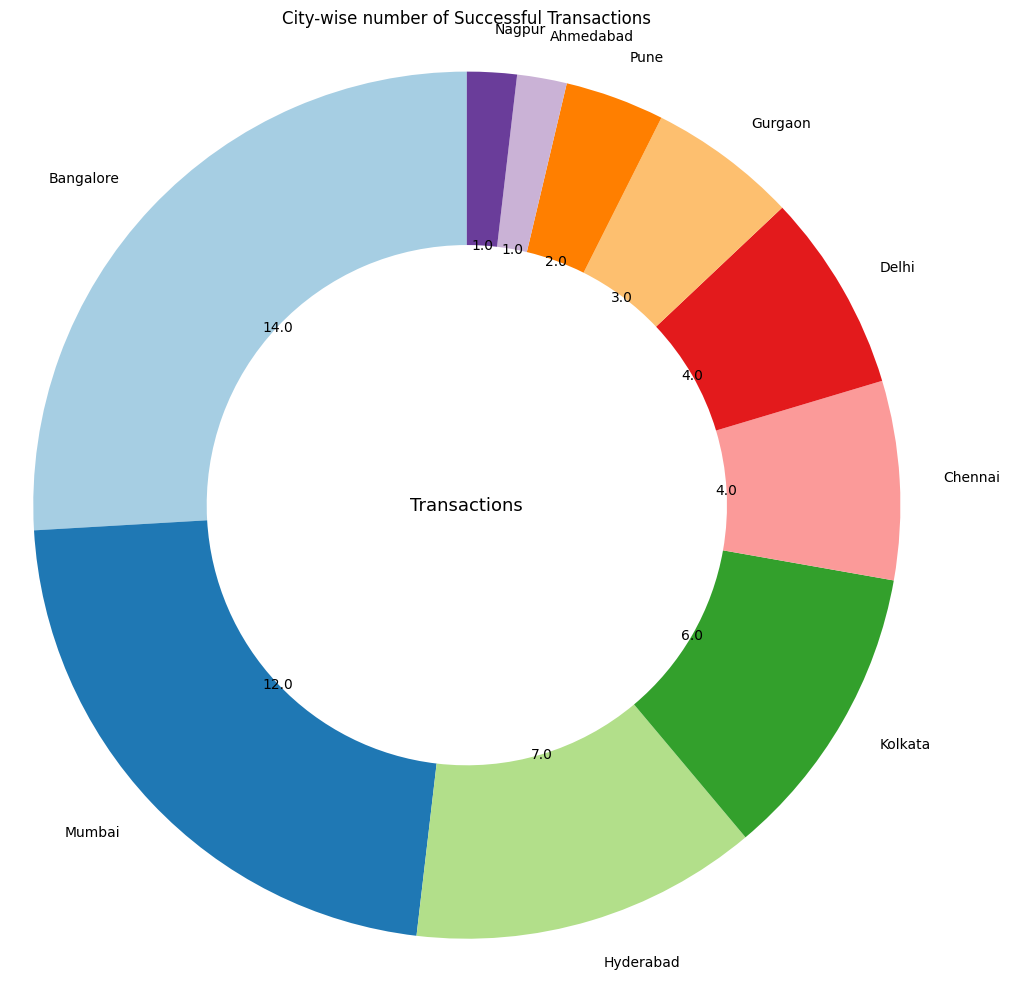

In [ ]:
def absolute_value(val):
    a = np.round(val/100.*query5_output['no_of_transactions'].sum(), 0)
    return a

plt.figure(figsize=(10,10))
plt.pie(query5_output['no_of_transactions'], labels=query5_output['city'], autopct=absolute_value, startangle=90,wedgeprops=dict(width=0.4), colors=plt.cm.Paired.colors)
plt.text(0, 0, 'Transactions', ha='center', va='center', fontsize=13)

plt.title("City-wise number of Successful Transactions")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Monthly spending summary

In [16]:
query6="""
SELECT * FROM monthly_spending_summary;
"""

query6_output = run_query(query6)

query6_output

C:\Users\91812\AppData\Local\Temp\ipykernel_19696\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,customer_id,customer_name,month_year,monthly_spent
0,1,Rahul Sen,06-2025,2500.0
1,2,Ananya Roy,06-2025,1998.0
2,3,Sourav Das,06-2025,97300.0
3,5,Vikram Joshi,06-2025,22000.0
4,6,Meera Iyer,06-2025,1200.0
5,7,Karan Kapoor,06-2025,5499.0
6,8,Sneha Patil,06-2025,499.0
7,9,Ravi Shankar,06-2025,3100.0
8,11,Alok Reddy,06-2025,12500.0
9,12,Isha Jain,06-2025,23899.0


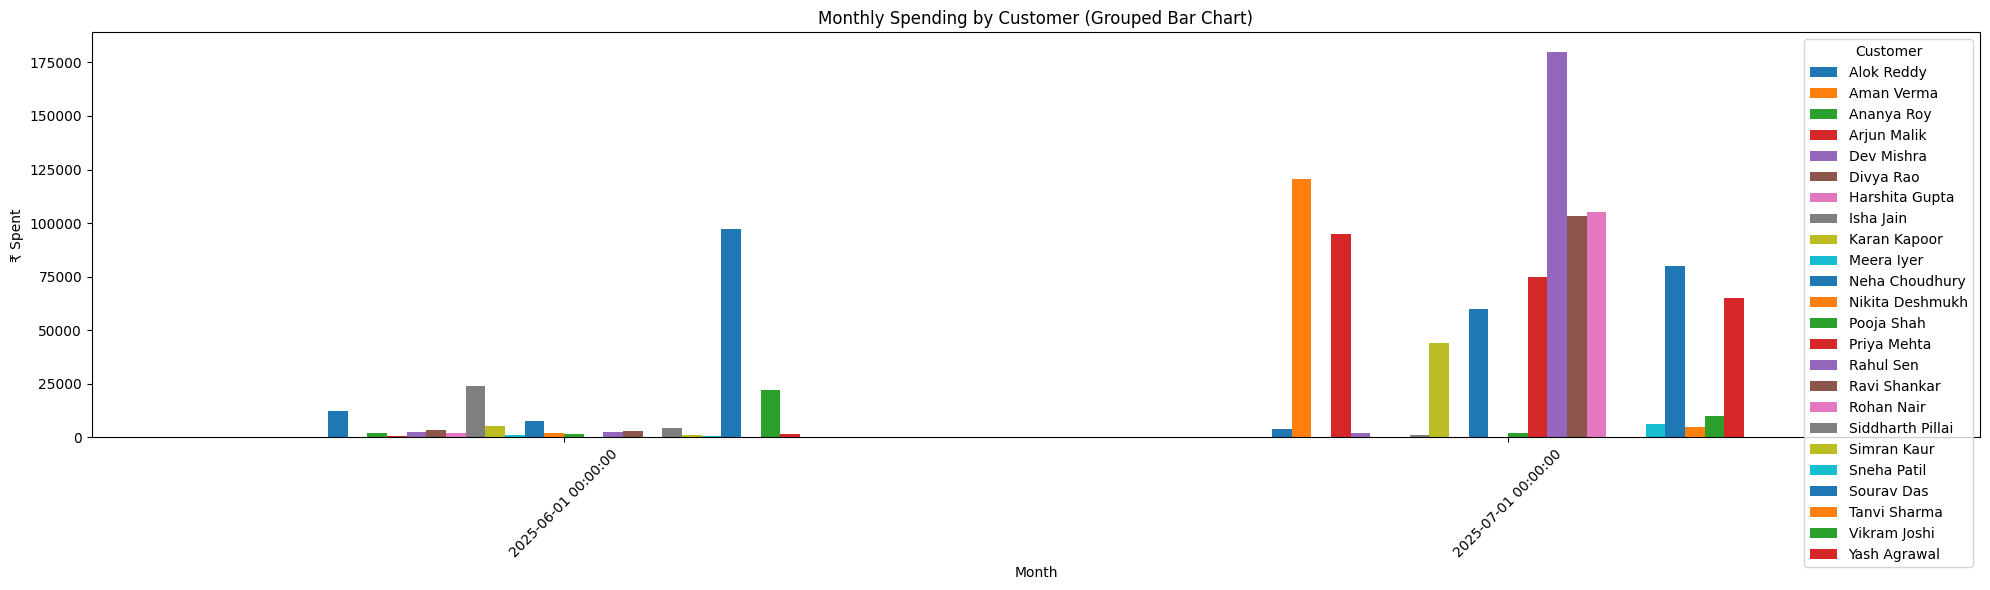

In [ ]:
query6_output['month_year'] = pd.to_datetime(query6_output['month_year'], format='%m-%Y')
df = query6_output.sort_values(['customer_name', 'month_year'])
pivot_df = df.pivot(index='month_year', columns='customer_name', values='monthly_spent').fillna(0)
pivot_df.plot(kind='bar', figsize=(20,6))
plt.title("Monthly Spending by Customer (Grouped Bar Chart)")
plt.xlabel("Month")
plt.ylabel("₹ Spent")
plt.xticks(rotation=45)
plt.legend(title="Customer")
plt.tight_layout()
plt.show()